In [20]:
import pandas as pd
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import tensorflow as tf

In [21]:
START = "2020-01-01"
TODAY = date.today().strftime("%Y-%m-%d")

# Define a function to load the dataset

def load_data(ticker):
    data = yf.download(ticker, START, TODAY)
    data.reset_index(inplace=True)
    return data

In [22]:
data = load_data('BTC-USD')
df=data
df.head()

[*********************100%%**********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-01,7194.892090,7254.330566,7174.944336,7200.174316,7200.174316,18565664997
1,2020-01-02,7202.551270,7212.155273,6935.270020,6985.470215,6985.470215,20802083465
2,2020-01-03,6984.428711,7413.715332,6914.996094,7344.884277,7344.884277,28111481032
3,2020-01-04,7345.375488,7427.385742,7309.514160,7410.656738,7410.656738,18444271275
4,2020-01-05,7410.451660,7544.497070,7400.535645,7411.317383,7411.317383,19725074095


In [23]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,7194.892090,7254.330566,7174.944336,7200.174316,18565664997
1,7202.551270,7212.155273,6935.270020,6985.470215,20802083465
2,6984.428711,7413.715332,6914.996094,7344.884277,28111481032
3,7345.375488,7427.385742,7309.514160,7410.656738,18444271275
4,7410.451660,7544.497070,7400.535645,7411.317383,19725074095


## Visualize closing prices

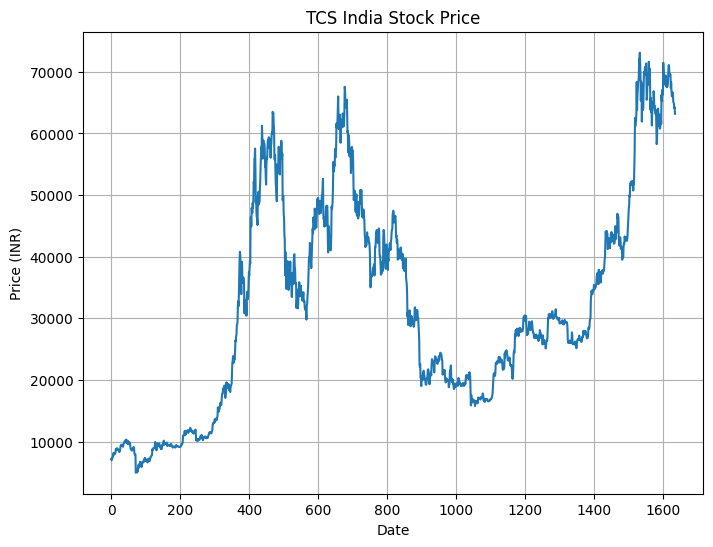

In [24]:
plt.figure(figsize=(8, 6))
plt.plot(df['Close'])
plt.title("TCS India Stock Price")
plt.xlabel("Date")
plt.ylabel("Price (INR)")
plt.grid(True)
plt.show()

## moving average of 100 days

In [25]:
ma100 = df.Close.rolling(100).mean()
ma100

0                NaN
1                NaN
2                NaN
3                NaN
4                NaN
            ...     
1631    66600.002461
1632    66533.476133
1633    66443.603125
1634    66372.162969
1635    66309.933203
Name: Close, Length: 1636, dtype: float64

Text(0.5, 1.0, 'Graph Of Moving Averages Of 100 Days')

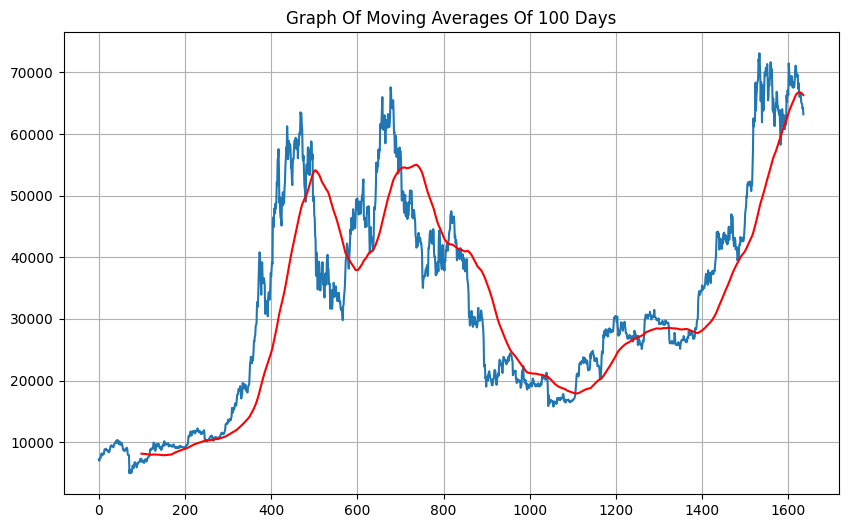

In [26]:
plt.figure(figsize = (10,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.grid(True)
plt.title('Graph Of Moving Averages Of 100 Days')

## Spliting the dataset into training (70%) and testing (30%) set

In [27]:
# Splitting data into training and testing

train = pd.DataFrame(data[0:int(len(data)*0.70)])
test = pd.DataFrame(data[int(len(data)*0.70): int(len(data))])

print(train.shape)
print(test.shape)

(1145, 7)
(491, 7)


In [28]:
train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-01,7194.892090,7254.330566,7174.944336,7200.174316,7200.174316,18565664997
1,2020-01-02,7202.551270,7212.155273,6935.270020,6985.470215,6985.470215,20802083465
2,2020-01-03,6984.428711,7413.715332,6914.996094,7344.884277,7344.884277,28111481032
3,2020-01-04,7345.375488,7427.385742,7309.514160,7410.656738,7410.656738,18444271275
4,2020-01-05,7410.451660,7544.497070,7400.535645,7411.317383,7411.317383,19725074095


In [29]:
test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
1145,2023-02-19,24640.027344,25093.054688,24327.642578,24327.642578,24327.642578,25555105670
1146,2023-02-20,24336.623047,25020.458984,23927.910156,24829.148438,24829.148438,28987376573
1147,2023-02-21,24833.048828,25126.851562,24200.363281,24436.353516,24436.353516,31252098714
1148,2023-02-22,24437.417969,24472.339844,23644.318359,24188.843750,24188.843750,30199996781
1149,2023-02-23,24190.718750,24572.089844,23693.919922,23947.492188,23947.492188,30476264066


## MinMax scaler for normalization

In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [32]:
train_close = train.iloc[:, 4:5].values
test_close = test.iloc[:, 4:5].values

In [33]:
data_training_array = scaler.fit_transform(train_close)
data_training_array

array([[0.03561545],
       [0.03218546],
       [0.03792726],
       ...,
       [0.29798509],
       [0.31303599],
       [0.31424495]])

In [34]:
x_train = []
y_train = [] 

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train) 

In [35]:
x_train.shape

(1045, 100, 1)

## LSTM MODEL

In [36]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [37]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(64, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1, activation="linear"))

/workspaces/Backtesting-Infrastructure-CryptoTrading/.venv/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [38]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 116,033 (453.25 KB)

 Trainable params: 116,033 (453.25 KB)

 Non-trainable params: 0 (0.00 B)

## Training the model

In [48]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=[tf.keras.metrics.MeanAbsoluteError()])
model.fit(x_train, y_train,batch_size=32,epochs = 50)

Epoch 1/50


33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 106ms/step - loss: 0.0048 - mean_absolute_error: 0.0480
Epoch 2/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - loss: 0.0032 - mean_absolute_error: 0.0373
Epoch 3/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 101ms/step - loss: 0.0030 - mean_absolute_error: 0.0381
Epoch 4/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step - loss: 0.0029 - mean_absolute_error: 0.0349
Epoch 5/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 99ms/step - loss: 0.0026 - mean_absolute_error: 0.0361
Epoch 6/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 107ms/step - loss: 0.0028 - mean_absolute_error: 0.0360
Epoch 7/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 99ms/step - loss: 0.0033 - mean_absolute_error: 0.0391
Epoch 8/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - loss: 0.0024 - mean_absolute_error: 0.0323
Epoch 9/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 101ms/step - loss: 0.0025 - mean_absolute_error: 0.0334
Epoch 10/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 102ms/step - loss: 0.0021 - mean_absolute_error: 0.0312
Epoch 11/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 10

In [49]:
model.save('model.h5')

In [50]:
test_close.shape

(491, 1)

In [51]:
past_100_days = pd.DataFrame(train_close[-100:])

In [52]:
test_df = pd.DataFrame(test_close)